In [2]:
!pip install -Uqq fastbook
import fastbook 
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.PETS)

In [6]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

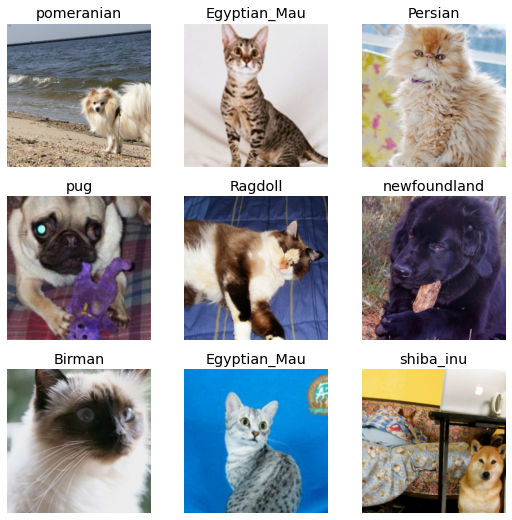

In [8]:
dls.show_batch()

In [9]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.501602,1.084780,0.325440,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.501920,0.890907,0.275372,01:14
1,0.343980,0.749244,0.230717,01:13


In [10]:
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.264087,0.865829,0.249662,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.244380,0.718128,0.219215,01:14
1,0.276809,0.748756,0.220568,01:14
2,0.221810,0.770983,0.215156,01:13
3,0.155892,0.656615,0.204330,01:13
4,0.097893,0.587987,0.181326,01:13
5,0.071075,0.571447,0.177267,01:13
